In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy
from scipy.fft import fft, ifft

#importing All the data

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
from sklearn import linear_model

In [ ]:
wells = []
for i in range(1,10):
  wells.append(pd.read_csv (r'/content/drive/MyDrive/datathon2/kaggleDataset/train/{int}/wells_info.csv'.format(int=i)))

In [ ]:
rp = []
for i in range(1,10):
  rp.append(pd.read_csv (r'/content/drive/MyDrive/datathon2/kaggleDataset/train/{int}/rate_and_pressure.csv'.format(int=i)))

In [ ]:
exp = []
for i in range(1,10):
  exp.append(pd.read_csv (r'/content/drive/MyDrive/datathon2/kaggleDataset/train/{int}/expected_output.csv'.format(int=i)))

Exploratory Data Analysis

In [ ]:
type(wells[0]['permeability'][55])


numpy.float64

In [ ]:
#x-y coordinates are the same
sum([np.array(rp[4]['injector-3-pressure']),np.array(rp[4]['injector-3-pressure'])])/2

In [ ]:
for df in rp[4]:
  plt.figure()
  plt.plot(t,rp[4][df])

In [ ]:
#features dynamic
prodQ=[]
pressQ=[]
for j in rp:
  apress = []
  aprod=[]
  for df in j:
    if df.find("production") == -1:
      apress.append(np.array(j[df]))
    if df.find("production") != -1:
      aprod.append(np.array(j[df]))
  prodQ.append(sum(aprod)/len(aprod))
  pressQ.append(sum(apress)/len(apress))

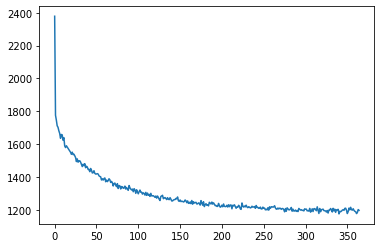

In [ ]:
plt.plot(t,1*prodQ[0])

In [ ]:
5

In [ ]:
t=exp[2]["timestep"]
y = fit(t,expQ25[2][0],expQ25[2][1],expQ25[2][2],expQ25[2][3])
plt.plot(t,data-y)

In [ ]:
plt.hist(data-y,bins=30)

In [ ]:
sum(abs(y-data))/364

98.7247185786611

In [ ]:
n=np.random.normal(loc=0,scale=70,size=365)

In [ ]:
def fit(x,a,b,c,d):
    return a/(x+0.01)+b+c*x+d*x**2

In [ ]:
#labels
expQ19=[]
expQ20=[]
expQ24=[]
expQ25=[]
for i in exp:
  data19 = np.array(i["producer-19-production"])
  data20 = np.array(i["producer-20-production"])
  data24 = np.array(i["producer-24-production"])
  data25 = np.array(i["producer-25-production"])
  p19,cov = curve_fit(fit,i["timestep"],smoothing(data19,20))
  p20,cov = curve_fit(fit,i["timestep"],smoothing(data20,20))
  p24,cov = curve_fit(fit,i["timestep"],smoothing(data24,20))
  p25,cov = curve_fit(fit,i["timestep"],smoothing(data25,20))
  expQ19.append(p19)
  expQ20.append(p20)
  expQ24.append(p24)
  expQ25.append(p25)


In [ ]:
#producing length 7 features
#labels
fQ19=[]
fQ20=[]
fQ24=[]
fQ25=[]
for i in range(len(prodQ)):
  data19 = np.array(rp[i]['producer-19-pressure'])
  data20 = np.array(rp[i]['producer-20-pressure'])
  data24 = np.array(rp[i]['producer-24-pressure'])
  data25 = np.array(rp[i]['producer-25-pressure'])
  p19,cov = curve_fit(fit,t,smoothing(data19,20))
  p20,cov = curve_fit(fit,t,smoothing(data20,20))
  p24,cov = curve_fit(fit,t,smoothing(data24,20))
  p25,cov = curve_fit(fit,t,smoothing(data25,20))
  p19 = np.append(p19,[wells[i]['permeability'][55],wells[i]['porosity'][55],wells[i]['thickness'][55]])
  p20 = np.append(p20,[wells[i]['permeability'][56],wells[i]['porosity'][56],wells[i]['thickness'][56]])
  p24 = np.append(p24,[wells[i]['permeability'][59],wells[i]['porosity'][59],wells[i]['thickness'][59]])
  p25 = np.append(p25,[wells[i]['permeability'][60],wells[i]['porosity'][60],wells[i]['thickness'][60]])
  fQ19.append(p19)
  fQ20.append(p20)
  fQ24.append(p24)
  fQ25.append(p25)

In [ ]:
fQ=np.array(fQ19+fQ20+fQ24+fQ25)
expQ=np.array(expQ19+expQ20+expQ24+expQ25)

In [ ]:
a = np.array([1,2,3])
b=np.array([1])
np.append(a,b)

array([1, 2, 3, 1])

In [ ]:
expQ19[0]

array([ 3.35684875e+01,  3.01890638e+03, -1.11255026e+01,  2.20263616e-02])

In [ ]:
sum(wells[1]['porosity'])/61

0.2811452741652798

In [ ]:
wellsQ = []
for i in wells:
  np.array([sum(i['porosity'])/61,sum(i['permeability'])/61,sum(i['thickness'])/61])

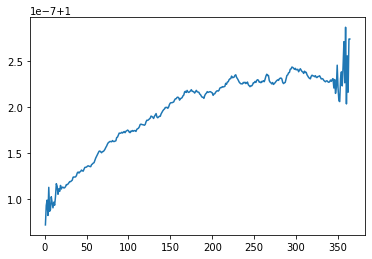

In [ ]:
plt.plot(exp[2]["timestep"][1:],1*np.exp(np.array(smoothing(data,20)[1:])**-2))

In [ ]:
plt.hist(abs(fft(data-smoothing(data,20))),bins=100)

In [ ]:
def filterN(data,cutoff1,cutoff2):
  filterLP = np.zeros(len(data))
  for i in range(cutoff1,cutoff2):
    filterLP[i]=1
  return ifft(filterLP*fft(data))

In [ ]:
def smoothing(series,n):
  data=[]
  for i in range(n):
    data.append(series[i])
  for i in range(n,len(series)-n):
    data.append(sum(series[i:i+n])/n)
  for i in range(len(series)-n+1,len(series)):
    data.append(series[i])  
  data.append(series[-1])
  return data

#Prediction

In [ ]:
wellstest = pd.read_csv (r'/content/drive/MyDrive/datathon2/kaggleDataset/test/wells_info.csv')
rptest = pd.read_csv (r'/content/drive/MyDrive/datathon2/kaggleDataset/test/rate_and_pressure.csv')

In [ ]:
aprod=[]
for df in rptest:
    if df.find("production") != -1:
      aprod.append(np.array(rptest[df]))
prodtest = sum(aprod)/len(aprod)

In [ ]:
  data19 = np.array(rptest['producer-19-pressure'])
  data20 = np.array(rptest['producer-20-pressure'])
  data24 = np.array(rptest['producer-24-pressure'])
  data25 = np.array(rptest['producer-25-pressure'])
  p19,cov = curve_fit(fit,t,smoothing(data19,20))
  p20,cov = curve_fit(fit,t,smoothing(data20,20))
  p24,cov = curve_fit(fit,t,smoothing(data24,20))
  p25,cov = curve_fit(fit,t,smoothing(data25,20))
  p19 = np.append(p19,[wellstest['permeability'][55],wellstest['porosity'][55],wellstest['thickness'][55]])
  p20 = np.append(p20,[wellstest['permeability'][56],wellstest['porosity'][56],wellstest['thickness'][56]])
  p24 = np.append(p24,[wellstest['permeability'][59],wellstest['porosity'][59],wellstest['thickness'][59]])
  p25 = np.append(p25,[wellstest['permeability'][60],wellstest['porosity'][60],wellstest['thickness'][60]])

In [ ]:
ptest,cov = curve_fit(fit,t,smoothing(prodtest,20))
ptest19 = np.append(ptest,[wellstest['permeability'][55],wellstest['porosity'][55],wellstest['thickness'][55]])
ptest20 = np.append(ptest,[wellstest['permeability'][56],wellstest['porosity'][56],wellstest['thickness'][56]])
ptest24 = np.append(ptest,[wellstest['permeability'][59],wellstest['porosity'][59],wellstest['thickness'][59]])
ptest25 = np.append(ptest,[wellstest['permeability'][60],wellstest['porosity'][60],wellstest['thickness'][60]])

In [ ]:
p = [p19.tolist(),p20.tolist(),p24.tolist(),p25.tolist()]

In [ ]:
p

[[-0.3340598684471098,
  5007.737915653242,
  -0.057875968424204276,
  8.52869485088806e-05,
  10.7510156655431,
  0.291264686946944,
  61.1665146295728],
 [-1.2117026678678229,
  5004.773082347564,
  -0.08290326933963463,
  0.0002934356094376209,
  10.0483276043624,
  0.285282915487243,
  41.9791116966117],
 [0.5607381917757825,
  5006.078983252644,
  -0.11309146731960694,
  0.00028524055578479446,
  13.395438305724,
  0.310726102294453,
  55.0836131868097],
 [-0.3202944239666002,
  5002.3669621267545,
  -0.0486123284824139,
  6.983452108728749e-05,
  10.4762232546732,
  0.288973360119767,
  61.4215965939146]]

In [ ]:
X = fQ
y = expQ

regr = linear_model.LassoLars(alpha=.3, normalize=False)
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
pred = regr.predict(p)

y=[]
for i in range(4):
  y.append(fit(t,pred[i][0],pred[i][1],pred[0][2],pred[0][3]))
createSubmission('greatestattempt', np.array(y[0]), np.array(y[1]), np.array(y[2]), np.array(y[3]))

[0      6690.203555
 1      3366.436637
 2      3337.536394
 3      3319.630957
 4      3304.531118
           ...     
 360    1993.326718
 361    1998.335498
 362    2003.392844
 363    2008.498758
 364    2013.653240
 Name: timestep, Length: 365, dtype: float64, 0      6848.322274
 1      3152.342222
 2      3121.590172
 3      3103.063364
 4      3087.652066
           ...     
 360    1775.520614
 361    1780.529364
 362    1785.586682
 363    1790.692567
 364    1795.847020
 Name: timestep, Length: 365, dtype: float64, 0      6354.752251
 1      3401.843493
 2      3374.788315
 3      3357.501986
 4      3342.712474
           ...     
 360    2032.431751
 361    2037.440559
 362    2042.497935
 363    2047.603877
 364    2052.758387
 Name: timestep, Length: 365, dtype: float64, 0      6715.900242
 1      3354.115903
 2      3325.026518
 3      3307.057615
 4      3291.925964
           ...     
 360    1980.626876
 361    1985.635652
 362    1990.692996
 363    1995.798907
 364 

In [ ]:
import pandas as pd
from itertools import product
import numpy as np

def createSubmission(fileName, data19, data20, data24, data25):
    # data[X] should correspond to well [X]
    dataMatrix = np.zeros([365,4])
    dataMatrix[:,0] = data19[:]
    dataMatrix[:,1] = data20[:]
    dataMatrix[:,2] = data24[:]
    dataMatrix[:,3] = data25[:]
    id = []
    pred = []
    wellID = [19,20,24,25]
    for wellInd, dayVal in product(range(4),range(365)):
        id.append(f"{wellID[wellInd]}-{dayVal}")
        pred.append(dataMatrix[dayVal][wellInd])

    output = pd.DataFrame({
        "Id": id,
        "Predicted": pred
    })

    output.to_csv(fileName,index=False)
